In [1]:
import sys
import os


# Add the 'zero123' directory to the Python path
zero123_dir = os.path.join("/home/pat", 'diffusion_augmentation', 'zero123')
sys.path.append(zero123_dir)

In [2]:
zero123_device = 'cuda:0'

In [3]:
# # Zero123 imports
from zero123.nerf import load_model_from_config, generate_angles
from zero123.ldm.util import create_carvekit_interface
from zero123.ldm.models.diffusion.ddim import DDIMSampler
from omegaconf import OmegaConf
from PIL import Image

In [4]:
def initialize_models():
    """
    Initialize all models and detectors used in the pipeline
    Returns:
        control_net: dict, containing all ControlNet models and detectors
        llava: dict, containing the LLAVA model and processor
        zero123: dict, containing the Zero123 model and Carvekit interface
        color_control: dict, containing the Color Control model and SAM annotator

    """

    # Zero123 models
    # print('Loading Zero123 models...')
    zero123 = {}
    config_path = './model_configs/sd-objaverse-finetune-c_concat-256.yaml'
    config = OmegaConf.load(config_path)

    model_path = "./models/105000.ckpt"
    model = load_model_from_config(config, model_path, zero123_device)
    model = model.to(zero123_device)

    # print('Creating Carvekit interface...')
    carvekit_interface = create_carvekit_interface()

    zero123['model'] = model
    zero123['carvekit_interface'] = carvekit_interface 


    return zero123


In [5]:
zero123 = initialize_models()

Loading model from ./models/105000.ckpt


/home/pat/diffusion_augmentation/zero123/nerf.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pl_sd = torch.load(ckpt, map_location='cpu')
/home/pat/miniconda3/envs/aut

Global Step: 105000
LatentDiffusion: Running in eps-prediction mode


/home/pat/miniconda3/envs/auto_aug2/lib/python3.10/site-packages/pytorch_lightning/core/lightning.py:2058: DeprecationWarning: `torch.distributed._sharded_tensor` will be deprecated, use `torch.distributed._shard.sharded_tensor` instead
  from torch.distributed._sharded_tensor import pre_load_state_dict_hook, state_dict_hook


DiffusionWrapper has 859.53 M params.
Keeping EMAs of 688.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels


/home/pat/miniconda3/envs/auto_aug2/lib/python3.10/site-packages/carvekit/ml/wrap/tracer_b7.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(model_path, map_l

old input_im: (598, 397)
Generating front view with angles x=0, y=0, z=0
Data shape for DDIM sampling is (1, 4, 32, 32), eta 1.0
Running DDIM Sampling with 49 timesteps


DDIM Sampler: 100%|██████████| 49/49 [00:01<00:00, 28.20it/s]


Sampled tensor shape: torch.Size([1, 4, 32, 32])
Generating left view with angles x=0, y=-15, z=0
Data shape for DDIM sampling is (1, 4, 32, 32), eta 1.0
Running DDIM Sampling with 49 timesteps


DDIM Sampler: 100%|██████████| 49/49 [00:01<00:00, 28.74it/s]


Sampled tensor shape: torch.Size([1, 4, 32, 32])
Generating right view with angles x=0, y=15, z=0
Data shape for DDIM sampling is (1, 4, 32, 32), eta 1.0
Running DDIM Sampling with 49 timesteps


DDIM Sampler: 100%|██████████| 49/49 [00:01<00:00, 28.66it/s]


Sampled tensor shape: torch.Size([1, 4, 32, 32])
Generating above view with angles x=-15, y=0, z=0
Data shape for DDIM sampling is (1, 4, 32, 32), eta 1.0
Running DDIM Sampling with 49 timesteps


DDIM Sampler: 100%|██████████| 49/49 [00:01<00:00, 28.63it/s]


Sampled tensor shape: torch.Size([1, 4, 32, 32])
Generating below view with angles x=15, y=0, z=0
Data shape for DDIM sampling is (1, 4, 32, 32), eta 1.0
Running DDIM Sampling with 49 timesteps


DDIM Sampler: 100%|██████████| 49/49 [00:01<00:00, 28.54it/s]


Sampled tensor shape: torch.Size([1, 4, 32, 32])
Generating behind view with angles x=0, y=180, z=0
Data shape for DDIM sampling is (1, 4, 32, 32), eta 1.0
Running DDIM Sampling with 49 timesteps


DDIM Sampler: 100%|██████████| 49/49 [00:01<00:00, 28.50it/s]

Sampled tensor shape: torch.Size([1, 4, 32, 32])


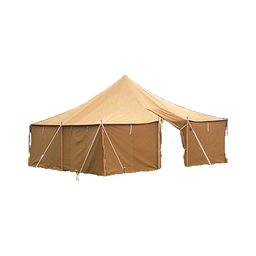

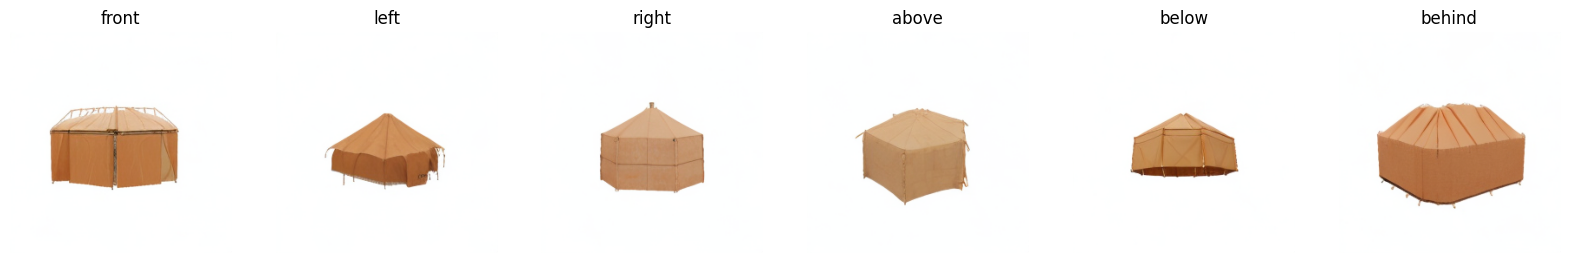

In [6]:
# Define the angles for augmentation
angles = [
    ("front", 0, 0, 0),
    ("left", 0, -15, 0),
    ("right", 0, 15, 0),
    ("above", -15, 0, 0),
    ("below", 15, 0, 0),
    ("behind", 0, 180, 0),
]

# Load the image 
image_path = '/home/pat/diffusion_augmentation/test_images/original.png'
image = Image.open(image_path)

# Apply Zero123 augmentations
preprocessed_image, augmented_images = generate_angles(
    input_image=image,
    angles=angles,
    model=zero123['model'],  # Your loaded model
    carvekit_interface=zero123['carvekit_interface'],  # Your Carvekit interface
    device=zero123_device,  # Your device (e.g., 'cuda:0')
    precision='autocast',  # Use 'autocast' for mixed precision if supported
    h=256,
    w=256,
    ddim_steps=50,
    scale=3.0,
    n_samples=1,
    ddim_eta=1.0
)
display(preprocessed_image)
import matplotlib.pyplot as plt
# Visualize the augmented images
fig, axes = plt.subplots(1, len(augmented_images), figsize=(20, 5))
for idx, img in enumerate(augmented_images):
    axes[idx].imshow(img)
    axes[idx].set_title(angles[idx][0])
    axes[idx].axis('off')
plt.show()
